## Matplotlib 画图基础与核心逻辑

1. 来源（Matlab逻辑）
2. 画图逻辑（Matlab语法/OOP语法）
3. 应用方法/流程（自定义函数/操作流程）
4. 自学/总结（不同）

In [1]:
import math
import copy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# 一些基本设置
# 设置支持中文字体（黑体）
matplotlib.rcParams['font.family'] = ['Heiti TC']
# 设置图片清晰度（200dpi: 200像素每英寸）
matplotlib.rcParams['figure.dpi'] = 200
# 图画面板调整为白色
matplotlib.rcParams['axes.facecolor']='white'
matplotlib.rcParams['savefig.facecolor']='white'

## 1-1. 提纲

## 1-2. mpl的起源

# 入门: 使用Matplotlib快速画图（以折线图为例）

In [4]:
# 初始化数据
seasons = [1,2,3,4]   # 季度
stock1 = [4,8,2,6]    # 股票1每个季度对应的股价
stock2 = [10,12,5,3]  # 股票2每个季度对应的股价

#转化数据为Numpy数组（可跳过）
seasons = np.array(seasons)
stock1 = np.array(stock1)
stock2 = np.array(stock2)

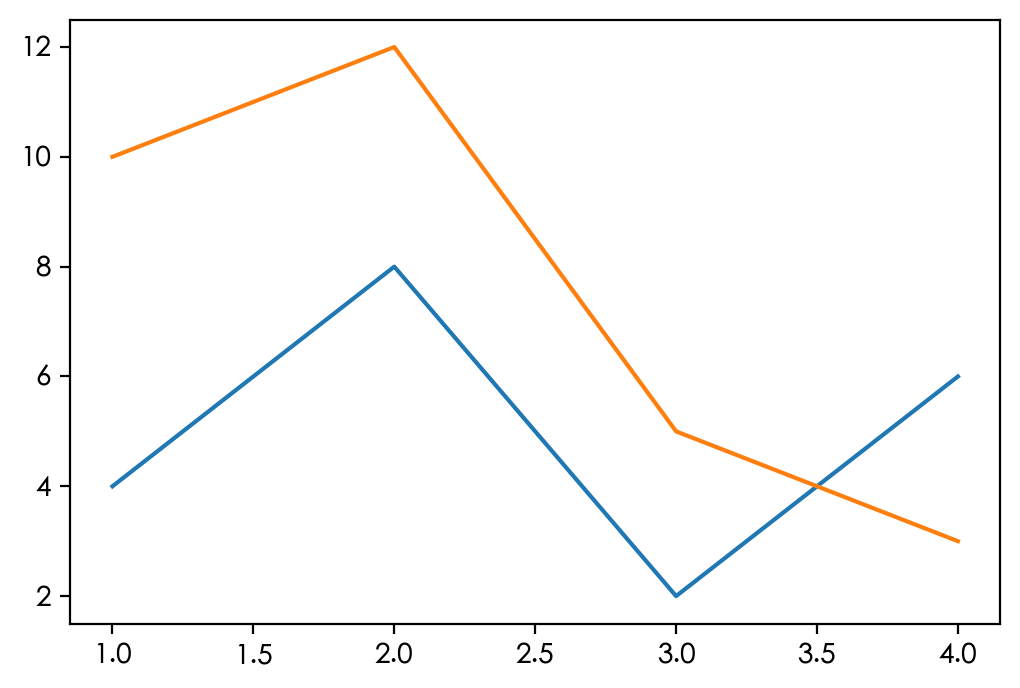

In [5]:
# 画出两个股价的折现图
plt.plot(seasons, stock1)
plt.plot(seasons, stock2)
# plt.savefig("images/pic1_1.png")
plt.show()

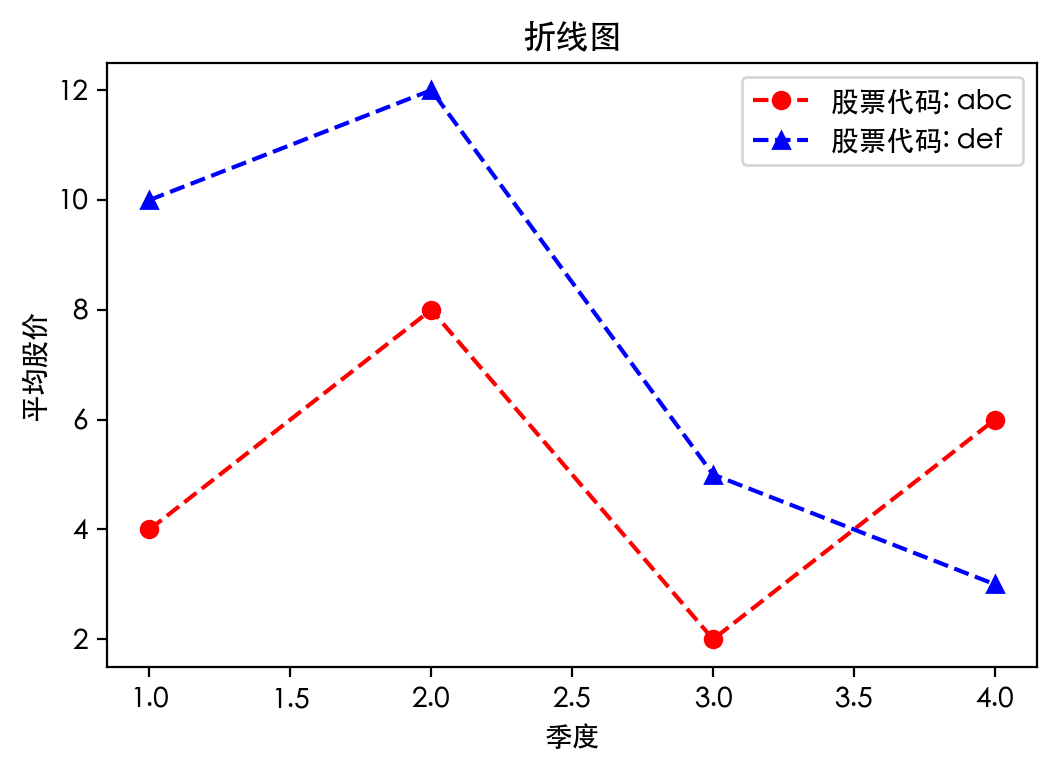

In [6]:
# 改进折线图
# 改进1: 指定折线图格式
plt.plot(seasons, stock1, "ro--", label="股票代码: abc")
plt.plot(seasons, stock2, "b^--", label="股票代码: def")
# plot第三个参数: fmt = '[marker][line][color]'
# 改进2: 添加标题，横纵坐标轴标注，图标
plt.title("折线图")  # 添加标题
plt.xlabel("季度")  # x轴
plt.ylabel("平均股价")  # y轴
plt.legend()  # 添加可视化图例
# plt.savefig("images/pic1_2.png")
plt.show()

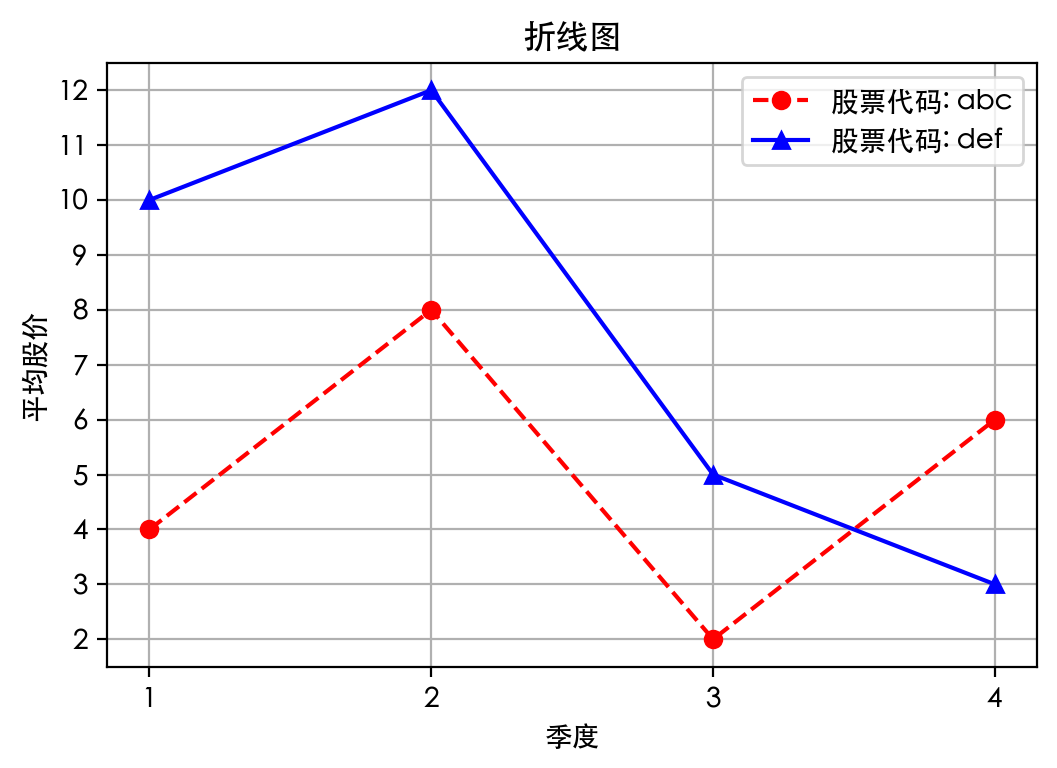

In [8]:
# 改进2: 
# 调整横纵坐标轴刻度
plt.plot(seasons, stock1,
         "ro--", label="股票代码: abc")
plt.plot(seasons, stock2,
         "b^-", label="股票代码: def")
plt.title("折线图")
plt.xlabel("季度")
plt.ylabel("平均股价")
plt.legend()
# 设置x/y坐标刻度
plt.xticks([1, 2, 3, 4])
plt.yticks(np.arange(2, 13, 1))
# 添加网格与辅助线
plt.grid()
# plt.savefig("images/pic1_3.png")
plt.show()

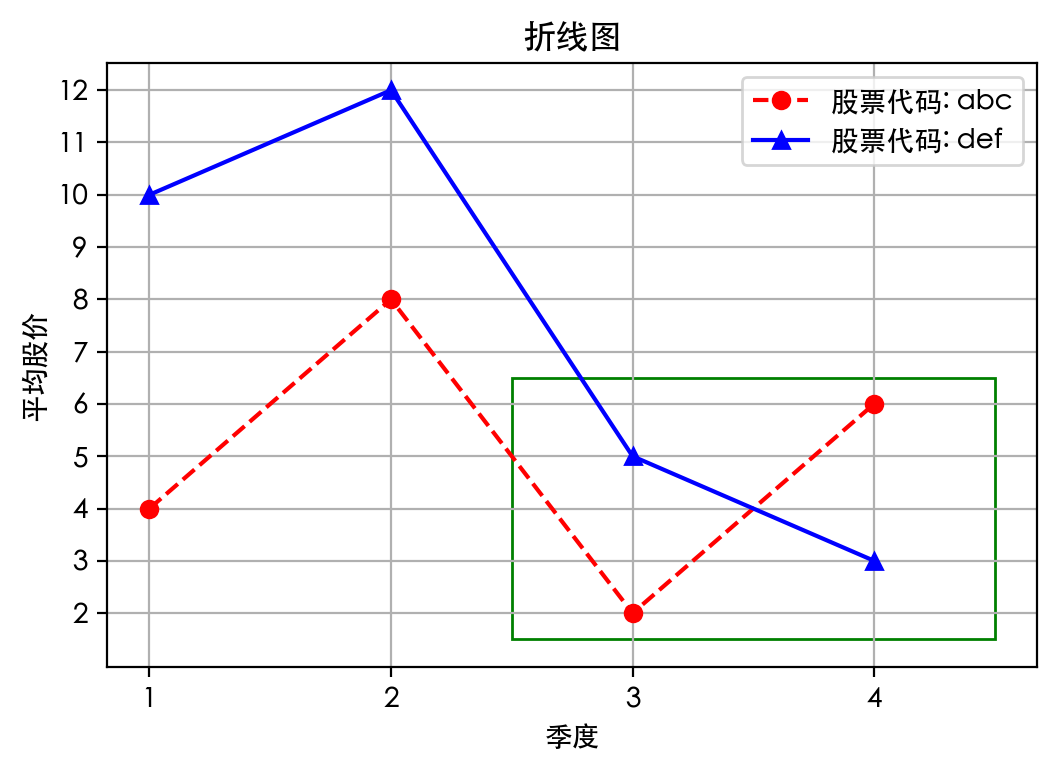

In [10]:
# 改进3: 添加一个绿色方块强调两个股票的股价在第4季度反转
import matplotlib.patches as patches

# 创建一个长方体对象
rect = patches.Rectangle((2.5, 1.5), 2, 5, 
                         linewidth=1, edgecolor='g',
                         facecolor='none')

plt.plot(seasons, stock1,
         "ro--", label="股票代码: abc")
plt.plot(seasons, stock2,
         "b^-", label="股票代码: def")
plt.title("折线图")
plt.xlabel("季度")
plt.ylabel("平均股价")

# 添加长方体
plt.gca().add_patch(rect)

plt.legend()
plt.xticks([1, 2, 3, 4])
plt.xticks
plt.yticks(np.arange(2, 13, 1))
plt.grid()
# plt.savefig("images/pic1_4.png")
plt.show()

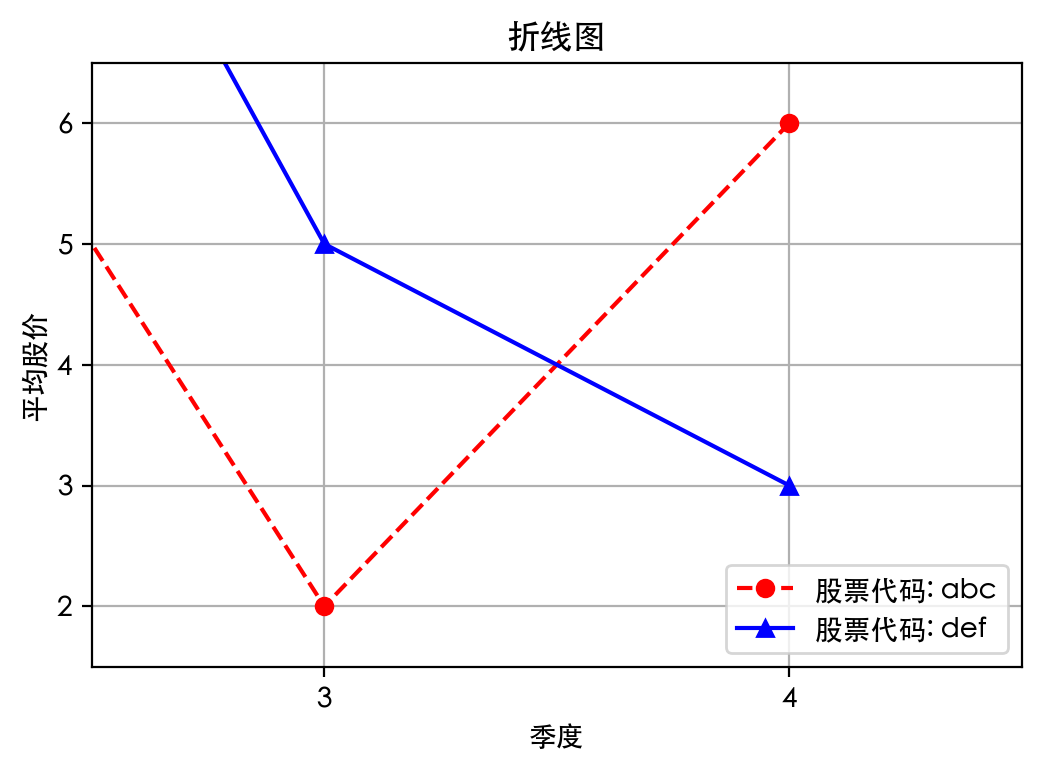

In [11]:
# 改进4: 改变时间轴的现实范围至上一张图片的绿色框中
plt.plot(seasons, stock1, "ro--", label="股票代码: abc")
plt.plot(seasons, stock2, "b^-", label="股票代码: def")
plt.title("折线图")
plt.xlabel("季度")
plt.ylabel("平均股价")
plt.legend()

plt.xticks([1, 2, 3, 4])
plt.yticks(np.arange(2, 13, 1))
plt.xlim(2.5, 4.5)
plt.ylim(1.5, 6.5)
plt.grid()
# plt.savefig("images/pic1_5.png")
plt.show()

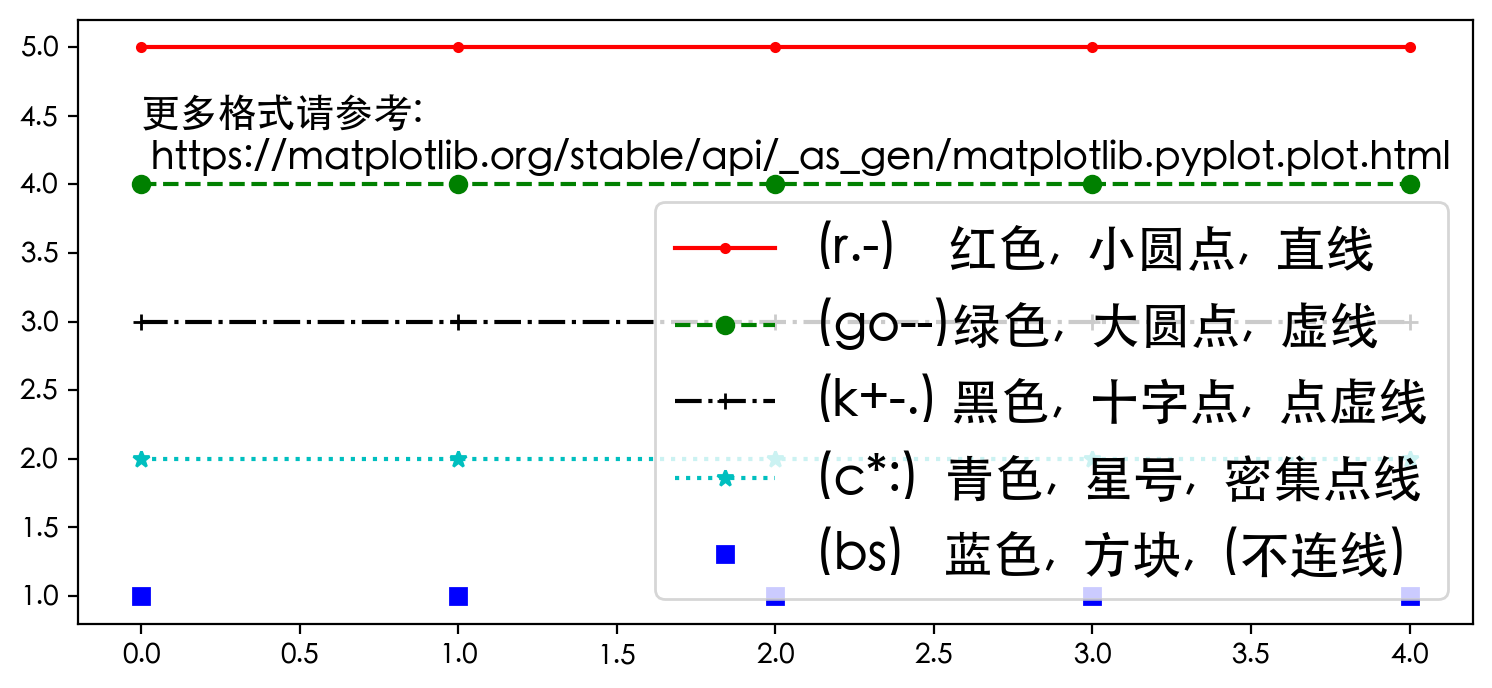

In [12]:
# 例子2: plt.plot()函数中的快捷格式字符字符说明
# 参考: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
# 点符号 + 颜色 + 连线符号
plt.figure(figsize=(9,4))
plt.plot(list(range(5)), [5]*5, 'r.-', label="(r.-)\t\t\t 红色,\t 小圆点,\t 直线")
plt.plot(list(range(5)), [4]*5, 'go--', label="(go--)绿色,\t 大圆点,\t 虚线")
plt.plot(list(range(5)), [3]*5, 'k+-.', label="(k+-.) 黑色,\t 十字点,\t 点虚线")
plt.plot(list(range(5)), [2]*5, 'c*:', label="(c*:)\t\t青色,\t 星号,\t 密集点线")
plt.plot(list(range(5)), [1]*5, 'bs', label="(bs)\t\t 蓝色,\t 方块,\t (不连线)")
plt.annotate("更多格式请参考:\n https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html",
            xy=(0.0, 4.1), fontsize=14)
plt.legend(loc='lower right', prop={'size': 18}) # bbox_to_anchor=(1, -0.1)
plt.savefig("images/pic2_1.png")
plt.show()

## Matplotlib中更多的一些图画类型（折线图，饼图，等等）
- https://matplotlib.org/stable/plot_types/index.html


## 按照Matlab的风格画图

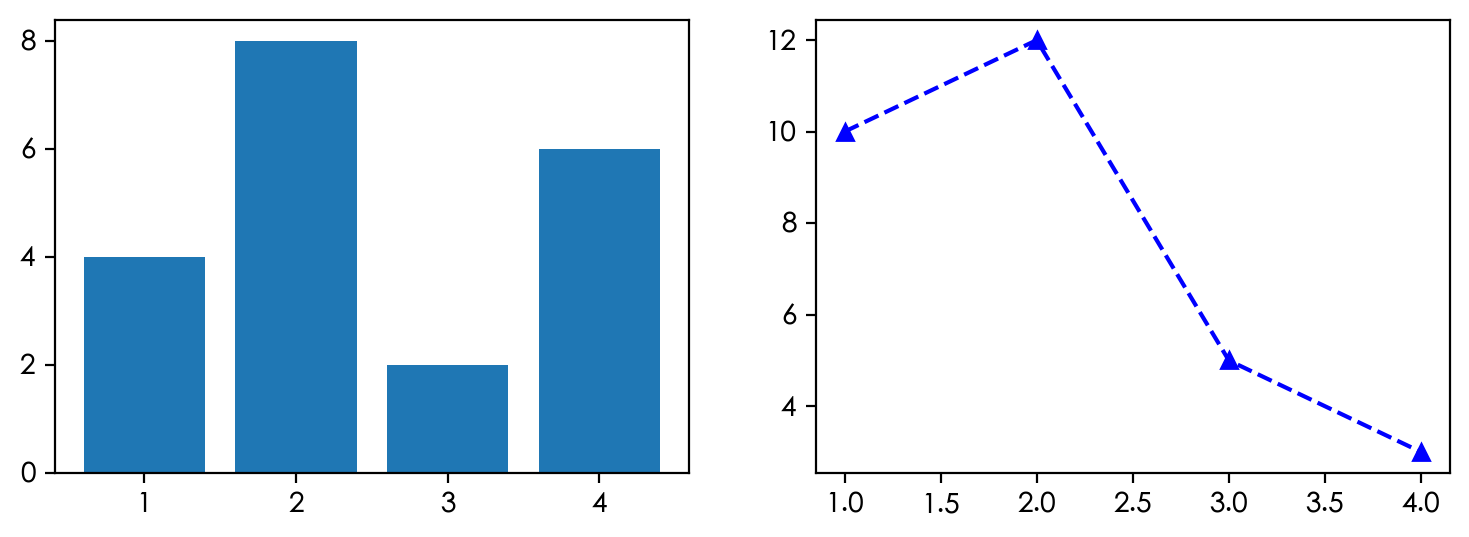

In [14]:
# 画两个图（两个坐标系Axes，一个画面Figure）
# Matlab语法（横向排列）
plt.figure(figsize=(9, 3)) # 画面大小(长 9 英寸, 高 3 英寸)
plt.subplot(121)  # 1行2列第1个图
plt.bar(seasons, stock1, label="股票代码: abc")
plt.subplot(122)  # 1行2列第2个图
plt.plot(seasons, stock2, "b^--", label="股票代码: def")
# plt.savefig("images/pic2_2.png")
plt.show()

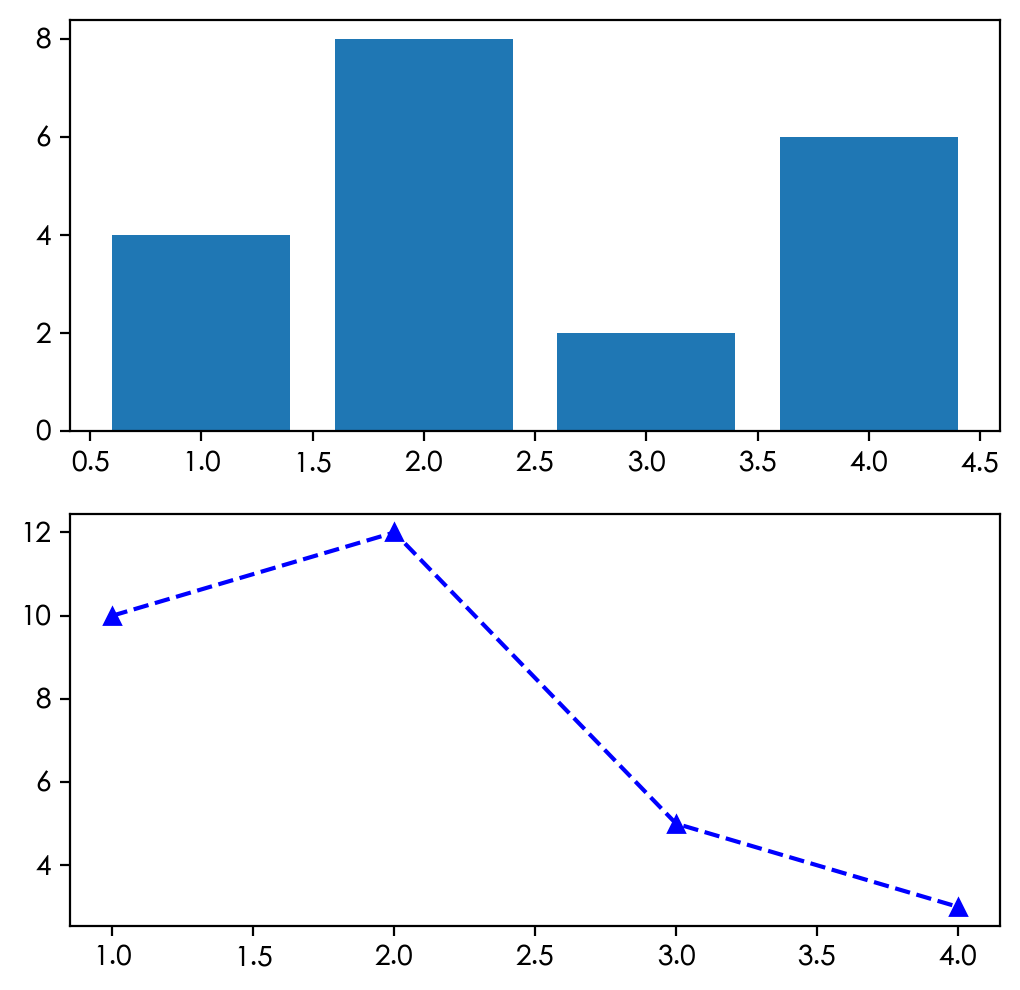

In [15]:
# 画两个图（两个坐标系Axes，一个画面Figure）
# Matlab语法（纵向排列）
plt.figure(figsize=(6, 6))
plt.subplot(211)
plt.bar(seasons, stock1, label="股票代码: abc")
plt.subplot(212)
plt.plot(seasons, stock2, "b^--", label="股票代码: def")
plt.savefig("images/pic2_3.png")
plt.show()

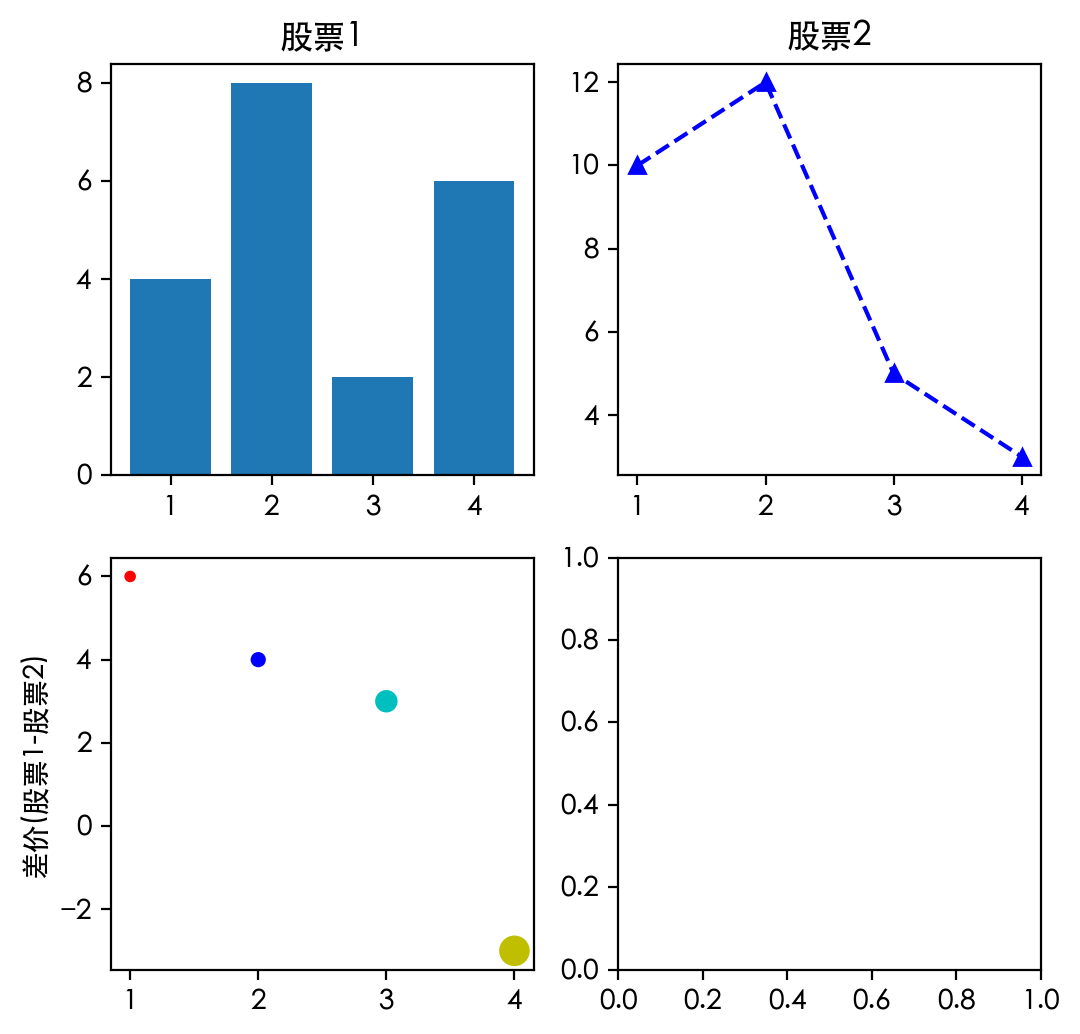

In [16]:
# 面向对象(Object-oriented programming)精确语法
# fig: 画面; axes: 2行2列坐标系（储存在numpy数组中）
fig, axes = plt.subplots(2, 2, figsize=(6, 6))
axes[0, 0].bar(seasons, stock1)  # 左上角(0行0列)坐标系
axes[0, 1].plot(seasons, stock2, "b^--")  # 右上角(0行1列)坐标系
ax = axes[1, 0]  # 左下角(1行0列)坐标系
# 左下角画散点图(scatterplots)
ax.scatter(seasons, # 季度（横坐标）
           stock2-stock1,  # 股票差价（纵坐标）
           s=[10, 20, 50, 100], # size字符大小
           c=['r', 'b', 'c', 'y']) # color颜色

axes[0, 0].set_title("股票1")  # 左上角(0行0列)标题
axes[0, 1].set_title("股票2")  # 右上角(0行1列)标题
ax.set_ylabel("差价(股票1-股票2)")  # 左下角(1行0列)y轴标注
# plt.savefig("images/pic2_4.png")
plt.show()

Text(0.5, 0.01, '季度')

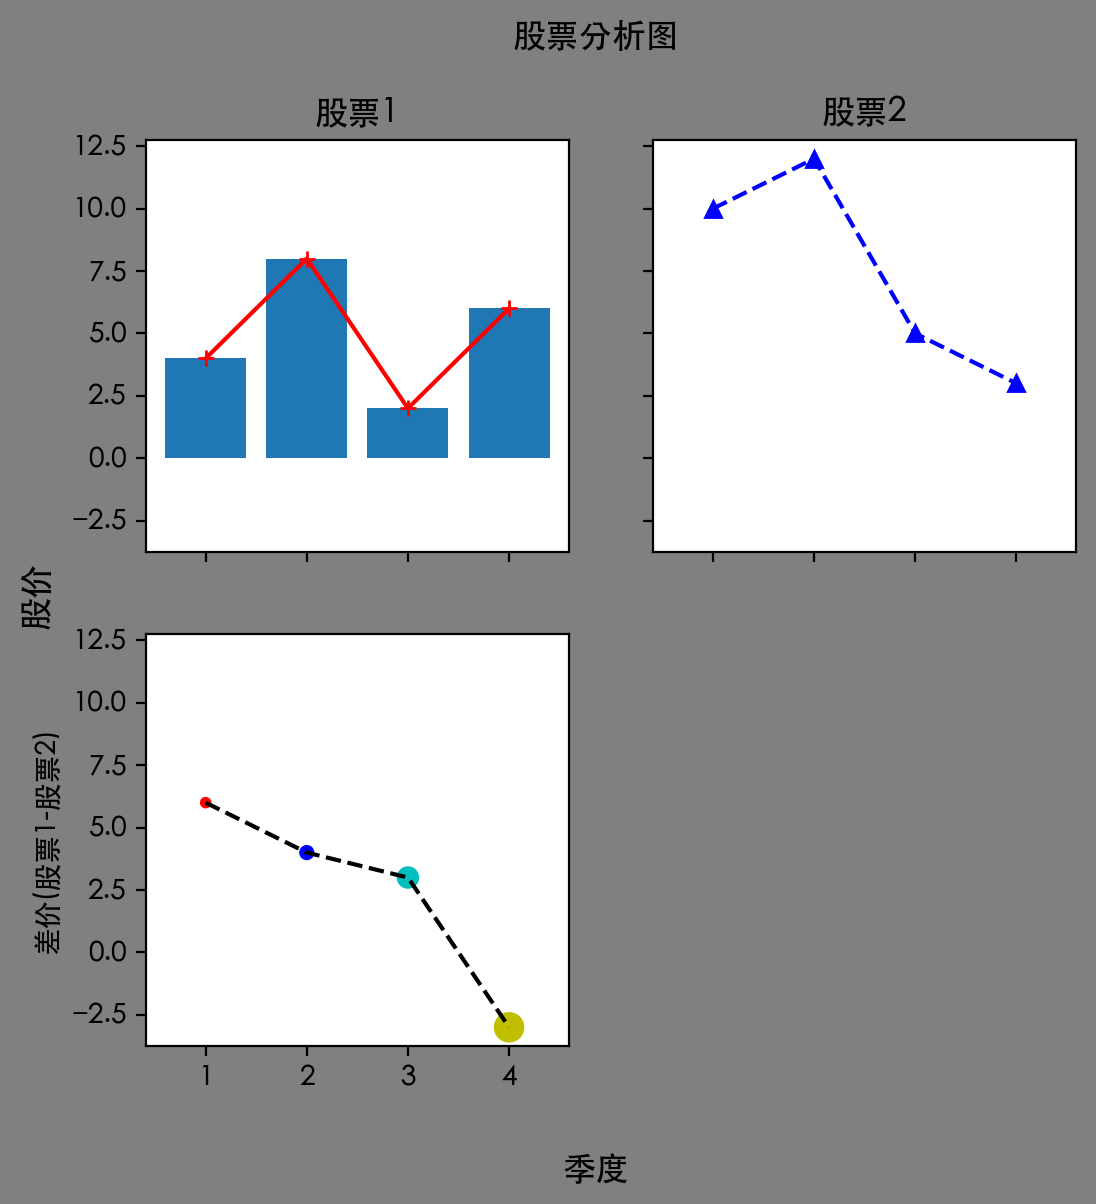

In [18]:
# 改进1: 去掉多余的坐标系
# 面向对象(Object-oriented programming)精确语法
fig, axes = plt.subplots(2, 2, figsize=(6, 6),
                        facecolor="grey",  # 画面背景改为灰色
                        sharex=True, sharey=True)  # 共享xy轴坐标系
axes[0, 0].bar(seasons, stock1)
axes[0, 1].plot(seasons, stock2, "b^--")
ax = axes[1, 0]
ax.plot(seasons, stock2-stock1, "--", color="black")
ax.scatter(seasons, stock2-stock1, 
           s=[10, 20, 50, 100],
           c=['r', 'b', 'c', 'y'])
ax.set_ylabel("差价(股票1-股票2)")
axes[0, 0].set_title("股票1")
axes[0, 1].set_title("股票2")

# 可以删除最后一个坐标系
axes[1, 1].remove()
axes[0, 0].plot(seasons, stock1, 'r+-')
fig.suptitle("股票分析图")
fig.supylabel("股价")
fig.supxlabel("季度")
# plt.savefig("images/pic2_5.png", facecolor=fig.get_facecolor()) # 注: 保存图片底色要重新设置

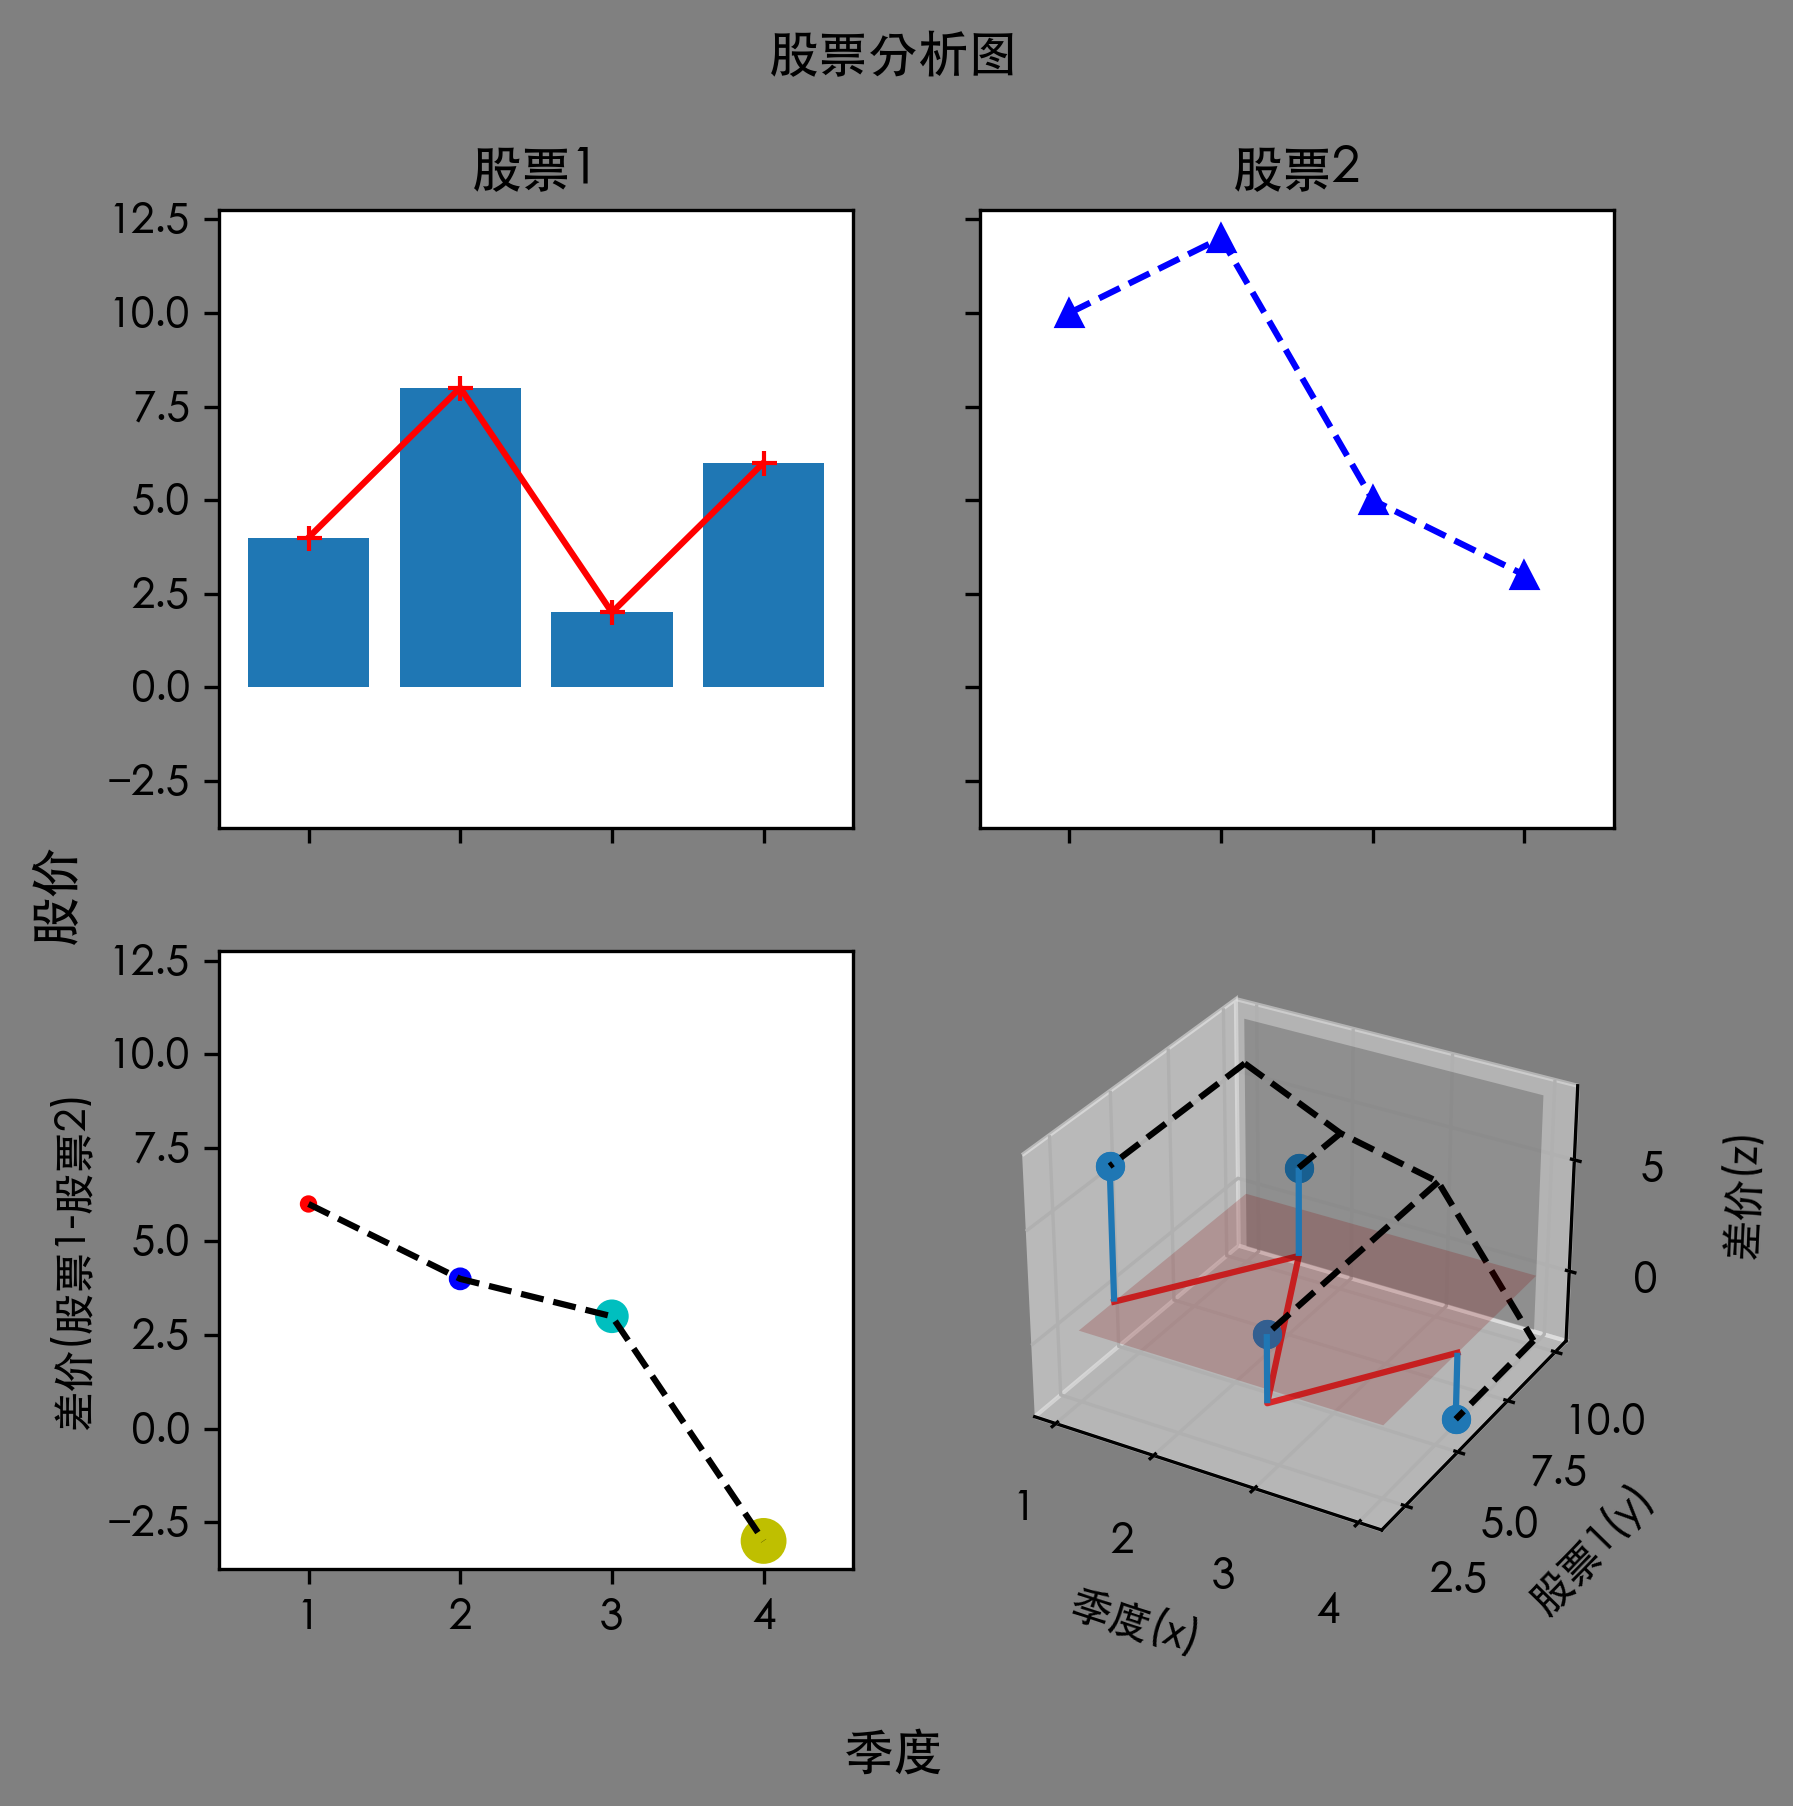

In [19]:
# 改进2: 利用右下角画一个3d图画
# 面向对象OOP精确语法
fig, axes = plt.subplots(2, 2, figsize=(6, 6),
                        facecolor="grey",
                        sharex=True, sharey=True)
axes[0, 0].bar(seasons, stock1)
axes[0, 1].plot(seasons, stock2, "b^--")
ax = axes[1, 0]
ax.scatter(seasons, stock2-stock1,
           s=[10, 20, 50, 100],
           c=['r', 'b', 'c', 'y'])
ax.plot(seasons, stock2-stock1, "--", color="black")
ax.set_ylabel("差价(股票1-股票2)")
axes[0, 0].plot(seasons, stock1, 'r+-')
fig.suptitle("股票分析图")
fig.supylabel("股价")
fig.supxlabel("季度")
axes[0, 0].set_title("股票1")
axes[0, 1].set_title("股票2")

# 删除右下角坐标系
axes[1, 1].remove()
# 重新添加右下角坐标系（改变为三维坐标系）
ax = fig.add_subplot(2, 2, 4, 
                     projection='3d', facecolor="grey")
ax.stem(seasons, stock1, stock2-stock1)
ax.stem(seasons, stock1, stock2-stock1, 
        linefmt='k--', basefmt='k--', 
        bottom=10, orientation='y')
ax.plot_surface(np.array([1,1,4,4]).reshape(2,2),
                np.array([2.5,10,2.5,10]).reshape(2,2),
                np.array([0]*4).reshape(2,2), 
                alpha=0.2, color='red')
ax.plot_surface(np.array([1,1,4,4]).reshape(2,2),
                np.array([10]*4).reshape(2,2),
                np.array([-2.5,8,-2.5,8]).reshape(2,2),
                alpha=0.2, color='black')
ax.set_xlabel("季度(x)")
ax.set_ylabel("股票1(y)")
ax.set_zlabel("差价(z)")
plt.savefig("images/pic2_6.png", facecolor=fig.get_facecolor())
plt.show()

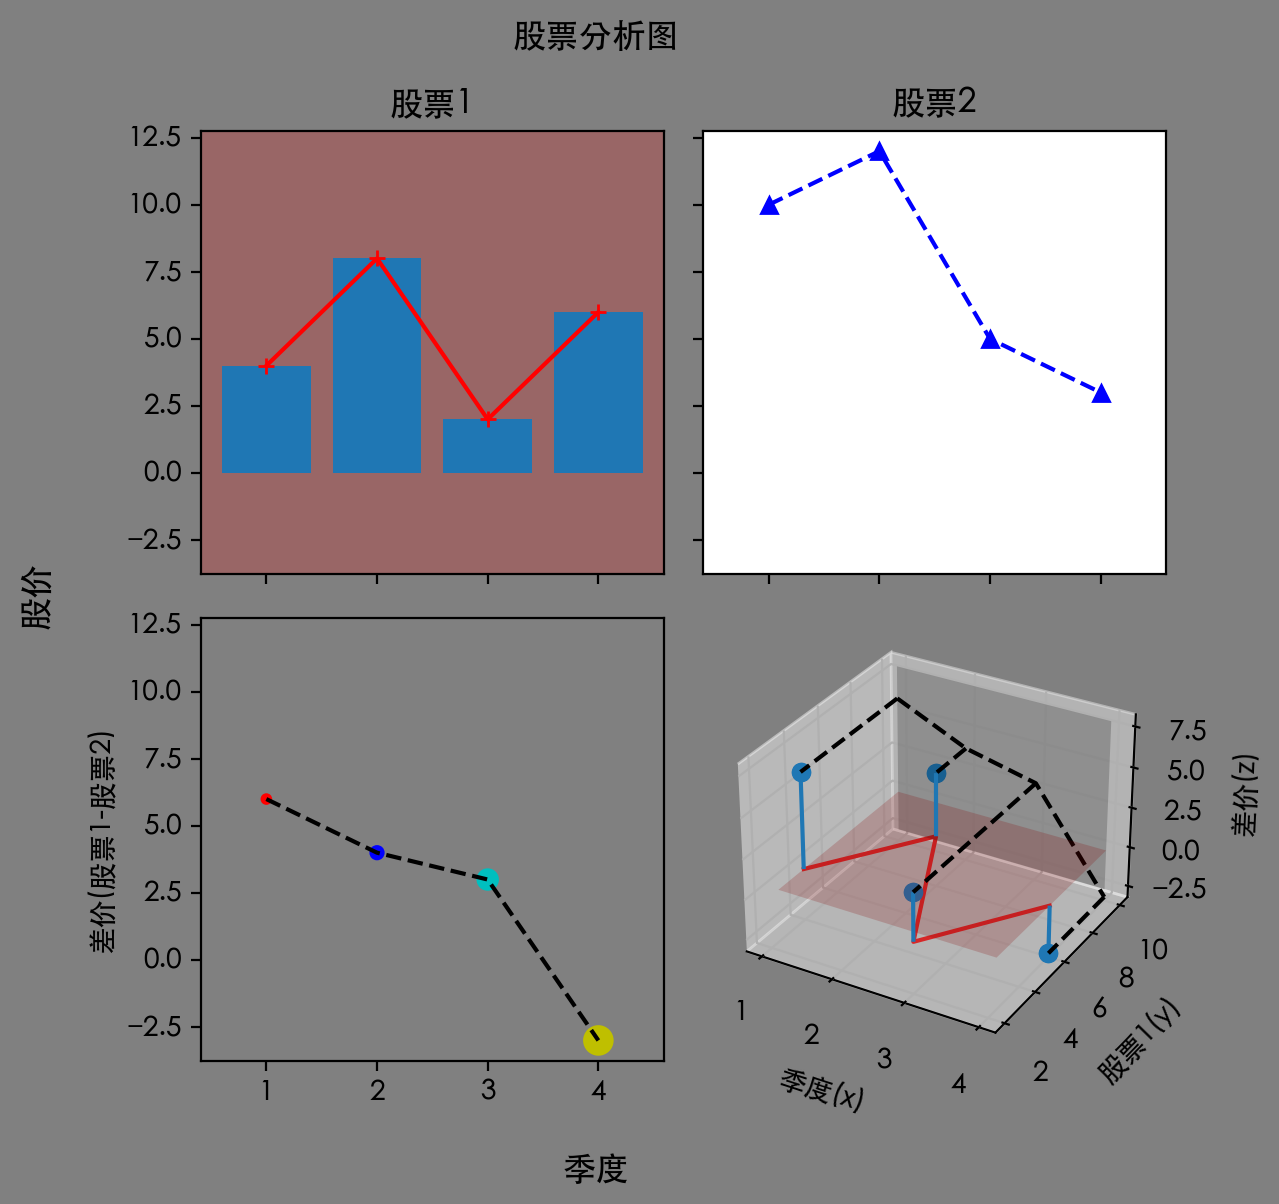

In [19]:
# 改进3: 坐标系改变背景颜色，与3D图片中的投影构成对应关系
# 面向对象OOP精确语法
fig, axes = plt.subplots(2, 2, figsize=(6, 6),
                        facecolor="grey",
                        sharex=True, sharey=True,
                        frameon=True)
axes[0, 0].bar(seasons, stock1)
axes[0, 1].plot(seasons, stock2, "b^--")
ax = axes[1, 0]
ax.scatter(seasons, stock2-stock1, 
                   s=[10, 20, 50, 100],
                   c=['r', 'b', 'c', 'y'])
ax.plot(seasons, stock2-stock1, "--", color="black")
ax.set_ylabel("差价(股票1-股票2)")
axes[0, 0].plot(seasons, stock1, 'r+-')
fig.suptitle("股票分析图")
fig.supylabel("股价")
fig.supxlabel("季度")
axes[0, 0].set_title("股票1")
axes[0, 1].set_title("股票2")

axes[1, 1].remove()
ax = fig.add_subplot(2, 2, 4, 
                     projection='3d', facecolor="grey")
ax.stem(seasons, stock1, stock2-stock1)
ax.stem(seasons, stock1, stock2-stock1, 
        linefmt='k--', basefmt='k--', 
        bottom=10, orientation='y')
ax.plot_surface(np.array([1,1,4,4]).reshape(2,2),
                np.array([2.5,10,2.5,10]).reshape(2,2),
                np.array([0]*4).reshape(2,2), 
                alpha=0.2, color='red')
ax.plot_surface(np.array([1,1,4,4]).reshape(2,2),
                np.array([10]*4).reshape(2,2),
                np.array([-2.5,8,-2.5,8]).reshape(2,2),
                alpha=0.2, color='black')
ax.set_xlabel("季度(x)")
ax.set_ylabel("股票1(y)")
ax.set_zlabel("差价(z)")

# 改变坐标系的背景颜色（在画图后改变属性，OOP）
axes[1, 0].set_facecolor('grey')
axes[1, 0].patch.set_alpha(0.2)
axes[0, 0].set_facecolor('red')
axes[0, 0].patch.set_alpha(0.2)
plt.tight_layout()

# plt.savefig("images/pic2_7.png", facecolor=fig.get_facecolor())
plt.show()

# 三.常用工作流程

In [3]:
# 步骤 1. 导入包
import matplotlib.pyplot as plt
import matplotlib as mpl  # 整个包
import numpy as np

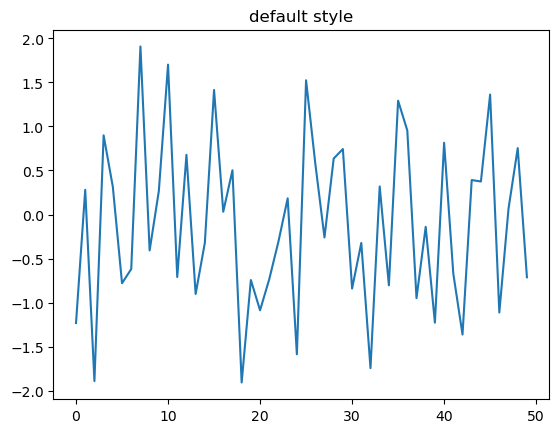

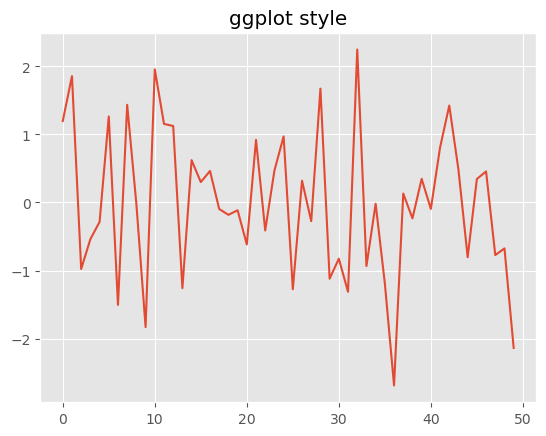

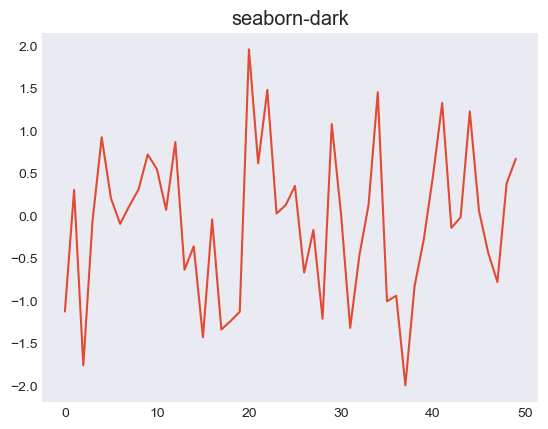

In [4]:
# 步骤 2. 查询所有画图整体风格
# print(plt.style.available)
plt.style.use('default')  # 默认风格
plt.plot(np.random.randn(50))
plt.title("default style")
# plt.savefig("images/style_1.png", facecolor=plt.gcf().get_facecolor())
plt.show()

plt.style.use('ggplot')
plt.plot(np.random.randn(50))
plt.title("ggplot style")
# plt.savefig("images/style_2.png", facecolor=plt.gcf().get_facecolor())
plt.show()

plt.style.use('seaborn-dark')
plt.plot(np.random.randn(50))
plt.title("seaborn-dark")
# plt.gcf().savefig("images/style_3.png", facecolor=plt.gcf().get_facecolor())
plt.show()
plt.style.use('default')  # 重新设置回默认风格

In [5]:
# 查询当前的一些画图属性设置
print(mpl.rcParams.get('figure.figsize'))  # 当前图画大小（长*高）（英寸）
print(mpl.rcParams.get('font.size'))  # 当前字体大小

[6.4, 4.8]
10.0


In [12]:
# 例子：查询当前你的计算机中matplotlib的可用字体
import matplotlib.font_manager as fm

fm._load_fontmanager(try_read_cache=False)
fpaths = fm.findSystemFonts(fontpaths=None)
# print(fpaths)
exempt_lst = ["NISC18030.ttf", "Emoji"]
skip=False
for i in fpaths:
    # print(i)
    for ft in exempt_lst:
        if ft in i:
            skip=True
    if skip==True:
        skip=False
        continue
    f = matplotlib.font_manager.get_font(i)
    print(f.family_name)

Zapf Dingbats
STIXNonUnicode
Noto Sans Newa
Noto Sans Old Turkic
Noto Sans Hatran
Noto Sans Miao
Noto Sans Ugaritic
Apple Symbols
.Aqua Kana
Arial Unicode MS
Herculanum
Bodoni Ornaments
.SF NS Mono
Noto Sans Chakma
Mishafi
STIXIntegralsSm
Corsiva Hebrew
Kannada MN
Noto Sans Pau Cin Hau
Noto Sans Pahawh Hmong
Hiragino Sans
Noto Sans Kaithi
Noto Sans Mongolian
PingFang HK
Noto Sans Syriac
Arial Unicode MS
STIXGeneral
STIXIntegralsD
Arial
Trebuchet MS
Times New Roman
Khmer MN
Noto Sans Buhid
Gurmukhi MN
Luminari
STIXNonUnicode
Times New Roman
Noto Sans Glagolitic
STIXIntegralsSm
Noto Sans Rejang
STIXSizeTwoSym
Waseem
STIXIntegralsD
Noto Sans Sundanese
STIXSizeFiveSym
STIXVariants
Apple SD Gothic Neo
Noto Sans Bhaiksuki
Hoefler Text
Charter
Trebuchet MS
STIXGeneral
Noto Sans Linear B
Noto Serif Ahom
Noto Sans Elbasan
Noto Sans Mahajani
Noto Sans Tai Le
Baghdad
Noto Sans Hanunoo
STIXSizeFourSym
Sukhumvit Set
Noto Sans Inscriptional Pahlavi
Noto Sans Myanmar
Comic Sans MS
Noto Sans Warang Ci

In [5]:
import matplotlib as mpl
# step 2. 一些常用设定参数
# 设置字体(主要字体/数学公式字符集)
rc = {"font.family" : "Times New Roman",  # 默认字体
      "mathtext.fontset" : "stix",  # 数学字符集
      }
mpl.rcParams.update(rc) # 根据dict一次性更新很多参数
# 设置图片清晰度（300dpi）
mpl.rcParams['figure.dpi'] = 300
# 图画面板调整为白色
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['savefig.facecolor'] = 'white'
# Figure自动调整格式
plt.rcParams['figure.constrained_layout.use'] = True

Font 'default' does not have a glyph for '\u70cf' [U+70cf], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u9f9c' [U+9f9c], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u70cf' [U+70cf], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u9f9c' [U+9f9c], substituting with a dummy symbol.


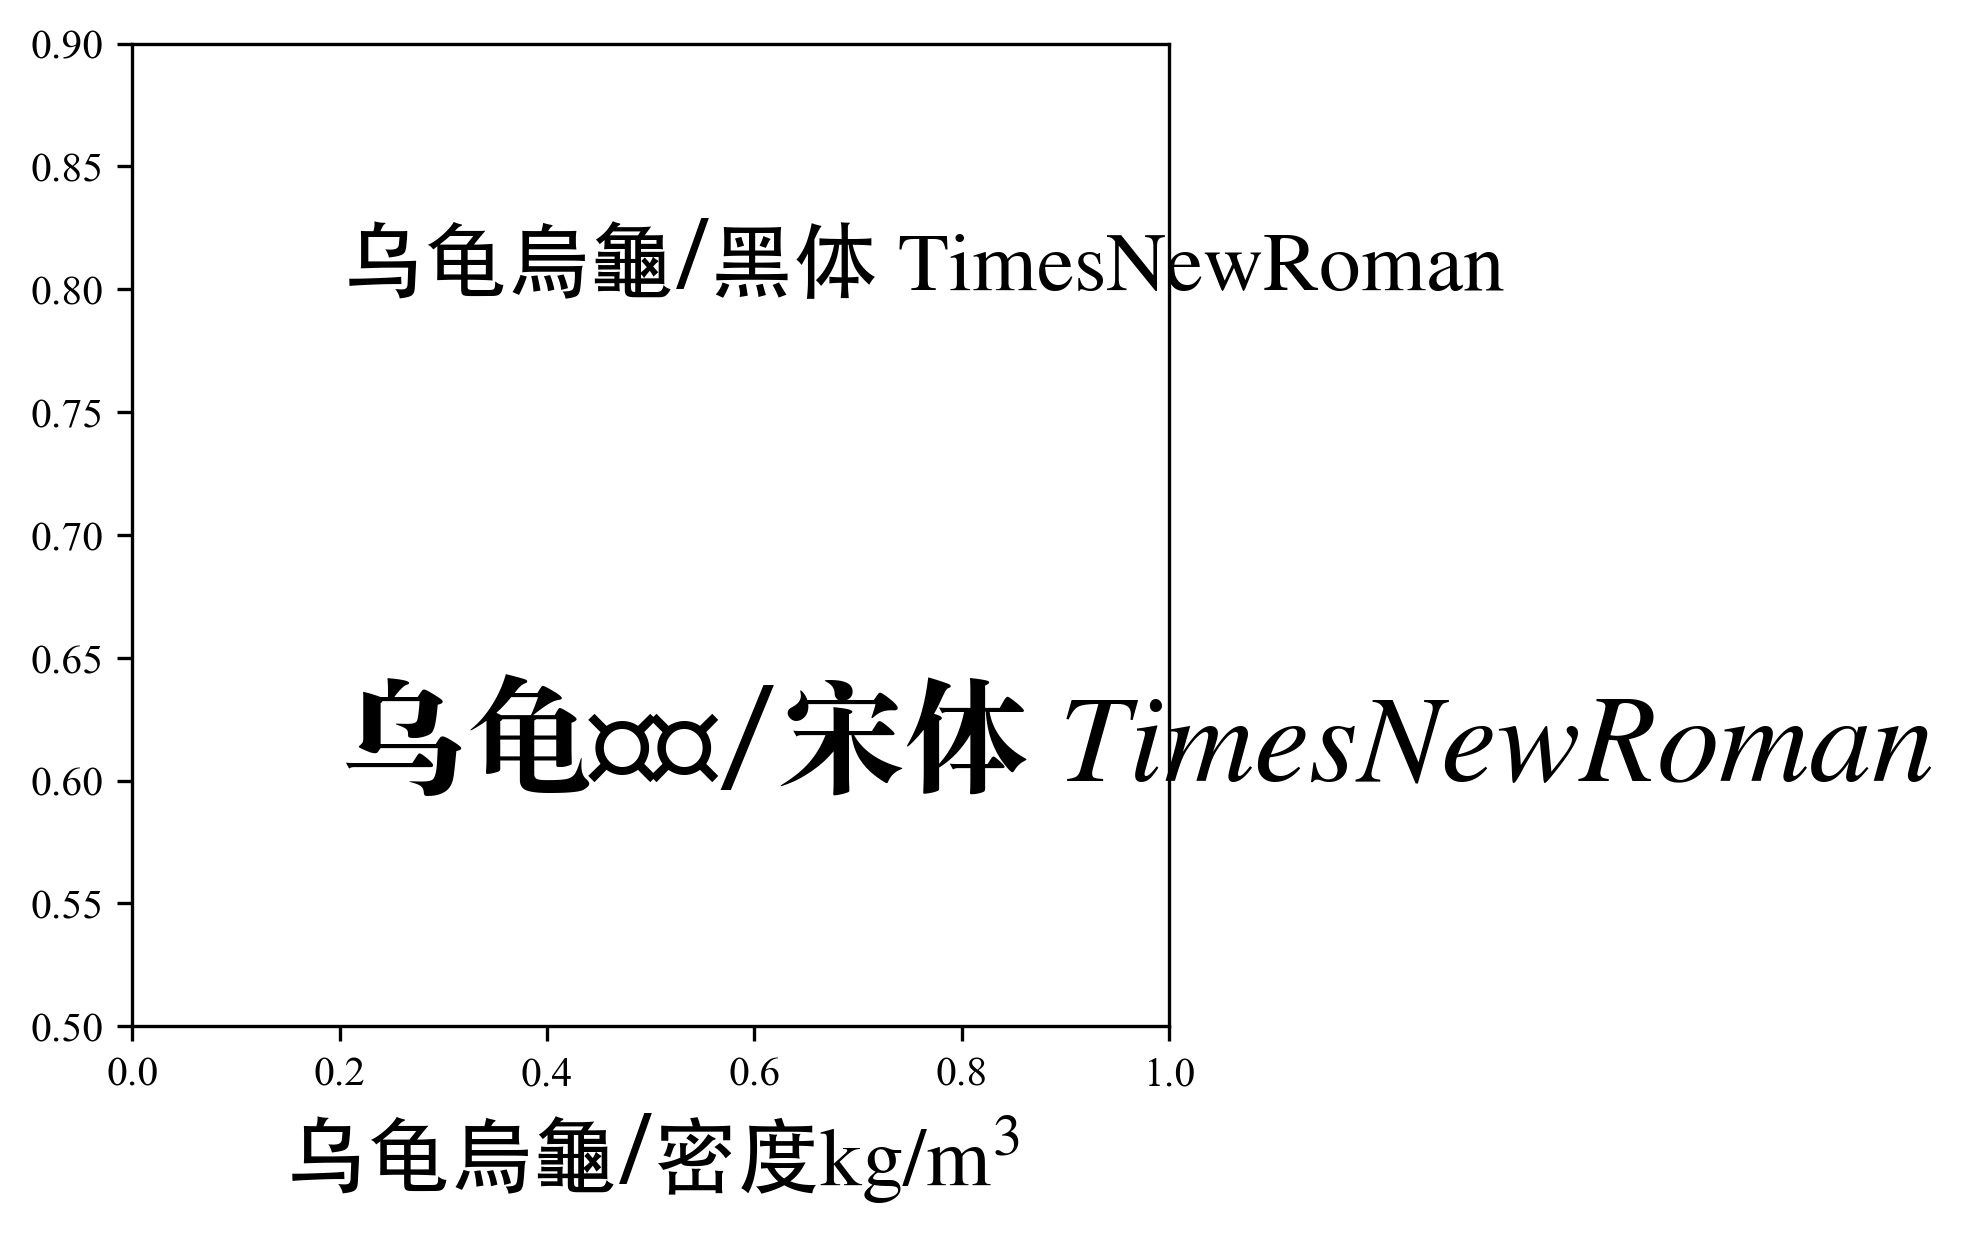

In [16]:
# 例子. 中英文/数学符号混排
fig, ax = plt.subplots()
# 单独添加字体
st_font = fm.FontProperties(fname="/System/Library/Fonts/Supplemental/Songti.ttc")
# 注(理论上): SC: 简体中文; TC: 繁体中文;
# 实际上一般应该是使用Heiti TC即可（所见即所得）
ax.set_xlabel(r'乌龟烏龜/密度$\mathrm{kg/m}^3$',
              fontname = 'Heiti TC', fontsize=20)  # 单独指定字体大小与格式
ax.text(0.2, 0.8, r'乌龟烏龜/黑体 $\mathrm{Times New Roman}$',
        fontname='Heiti TC', fontsize=20)
# 目前其他字体支持也比较有限。。。如这里宋体没有繁体
ax.text(0.2, 0.6, r'乌龟烏龜/宋体 $Times New Roman$', 
        fontproperties=st_font, fontsize=30)
plt.ylim(0.5, 0.9)

# plt.savefig("images/pic3_1.png", facecolor=fig.get_facecolor())
plt.show()

## 工作流程2: 重复使代码（使用函数）

In [19]:
# 三个“三角函数”
x = np.linspace(0, 10, 100)
y1 = np.cos(x)
y2 = np.sin(x)
y3 = np.tanh(x) # tanh函数

/var/folders/71/d5xhvtkn215cb3g26qsjh5q00000gn/T/ipykernel_25617/2196136604.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels([r"{:.2f}$\pi$".format(i/2) for i, l in enumerate(labs)])


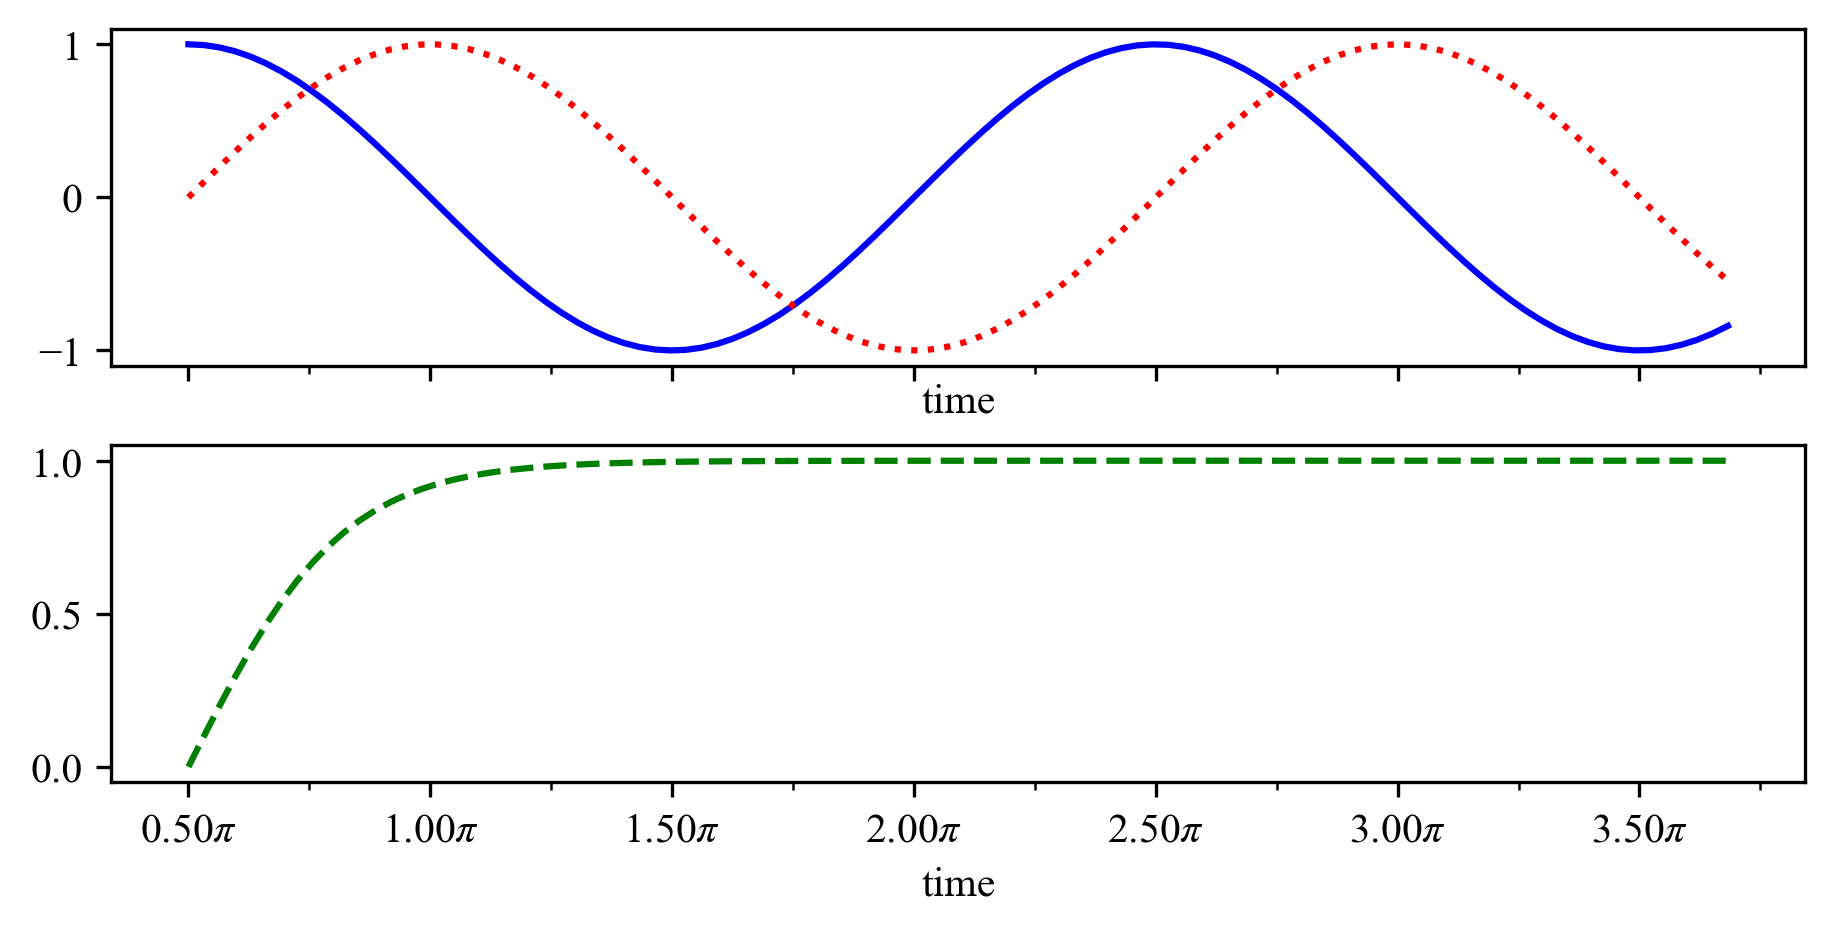

In [21]:
# 画时间序列曲线
# 输入/输出都包含坐标轴变量
def plot_time_series(x, y, fmt, lab="", ax=None):
    if ax is None:
        fig, ax = plt.subplot()
    ax.plot(x, y, fmt, label=lab)
    # x轴固有格式
    ax.set_xlabel("time")
    ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
    labs = ax.xaxis.get_ticklabels()
    ax.xaxis.set_ticklabels([r"{:.2f}$\pi$".format(i/2) for i, l in enumerate(labs)])
    return ax

# 两个坐标周
fig, axes = plt.subplots(2, 1, figsize=(6, 3),
                         sharex=True, facecolor="white")
# 在第一个坐标周画两条线
plot_time_series(x, y1, 'b-', r'$y=sin(x)$', ax=axes[0])
plot_time_series(x, y2, 'r:', r'$y=cos(x)$', ax=axes[0])
# 在第二个坐标周画一条线
plot_time_series(x, y3, 'g--', ax=axes[1])

# plt.savefig("images/pic3_2.png", facecolor=fig.get_facecolor())
plt.show()

/var/folders/71/d5xhvtkn215cb3g26qsjh5q00000gn/T/ipykernel_25617/3644634002.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels([r"{:.2f}$\pi$".format(i/2) for i, l in enumerate(labs)])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


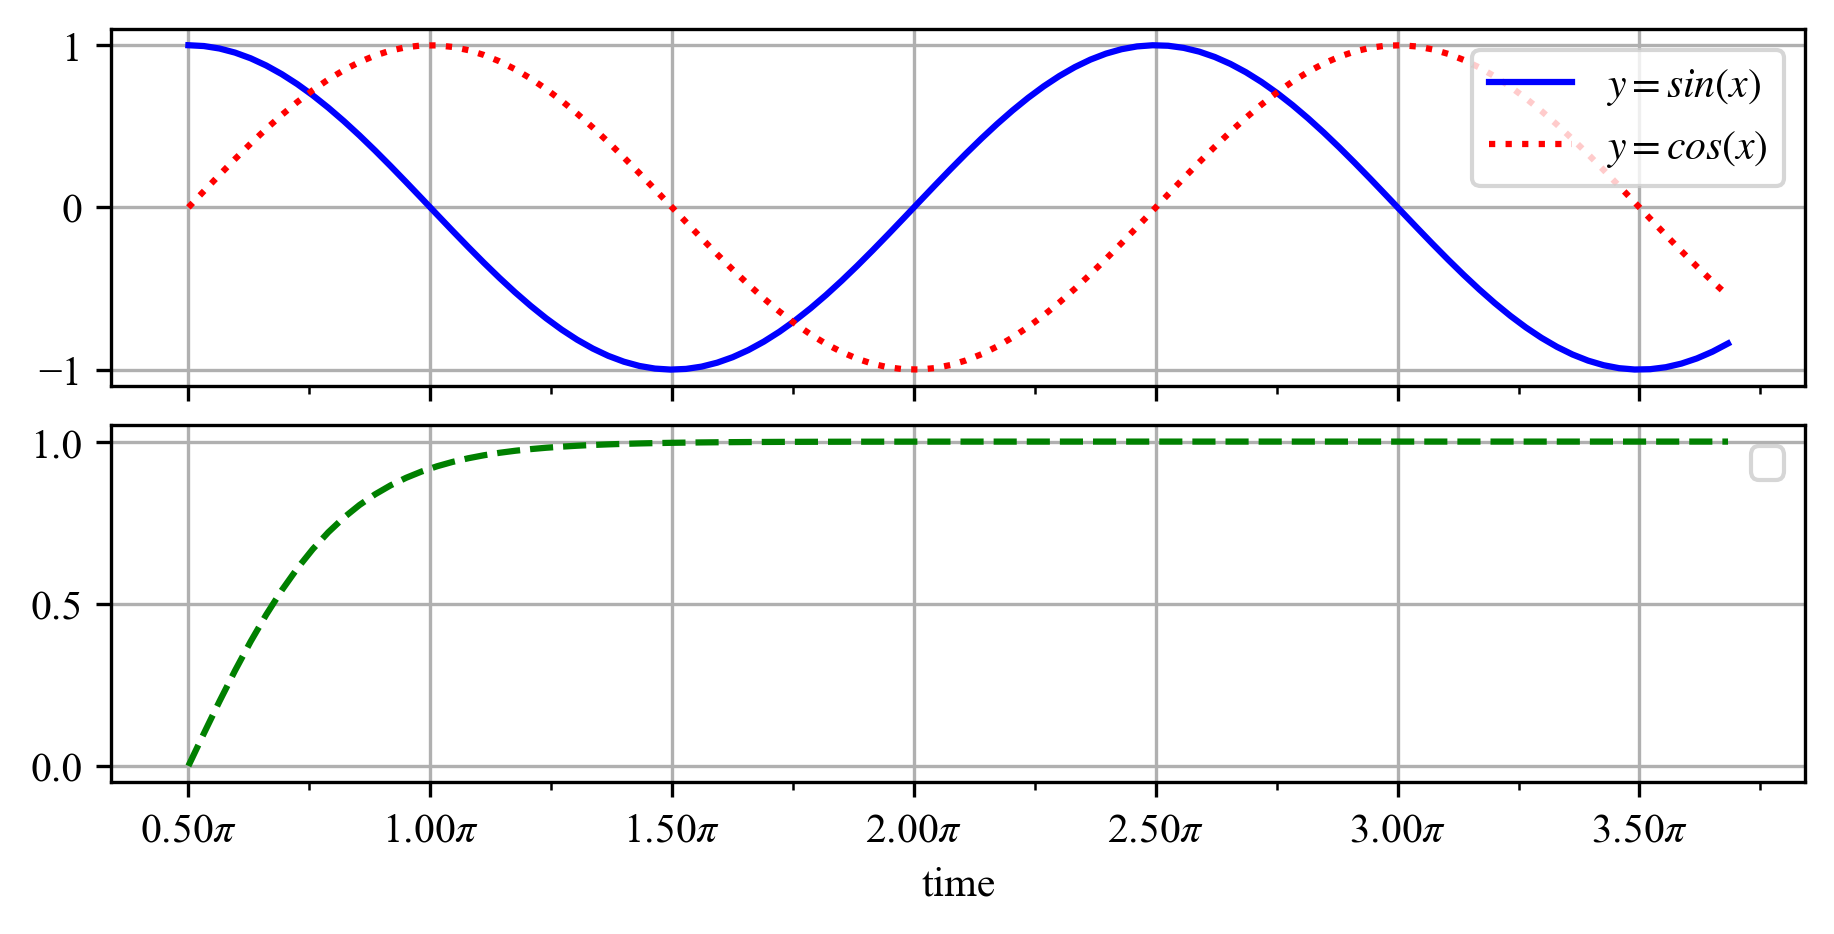

In [23]:
# 拓展：很多格式可以后期再函数外处理
def plot_time_series(x, y, fmt, lab="", ax=None):
    if ax is None:
        fig, ax = plt.subplot()
    ax.plot(x, y, fmt, label=lab)
    # x轴固有格式
    ax.set_xlabel("time")
    ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
    labs = ax.xaxis.get_ticklabels()
    ax.xaxis.set_ticklabels([r"{:.2f}$\pi$".format(i/2) for i, l in enumerate(labs)])
    return ax

fig, axes = plt.subplots(2, 1, figsize=(6, 3), 
                         sharex=True, facecolor="white")
plot_time_series(x, y1, 'b-', r'$y=sin(x)$', axes[0])
plot_time_series(x, y2, 'r:', r'$y=cos(x)$', axes[0])
plot_time_series(x, y3, 'g--', ax=axes[1])

# 后期调整格式/添加内容/美化...
axes[0].set_xlabel("")
axes[0].legend(loc="upper right")
axes[1].legend(loc="upper right")
axes[0].grid()
axes[1].grid()

# plt.savefig("images/pic3_3.png", facecolor=fig.get_facecolor())
plt.show()

/var/folders/71/d5xhvtkn215cb3g26qsjh5q00000gn/T/ipykernel_25617/3644634002.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels([r"{:.2f}$\pi$".format(i/2) for i, l in enumerate(labs)])


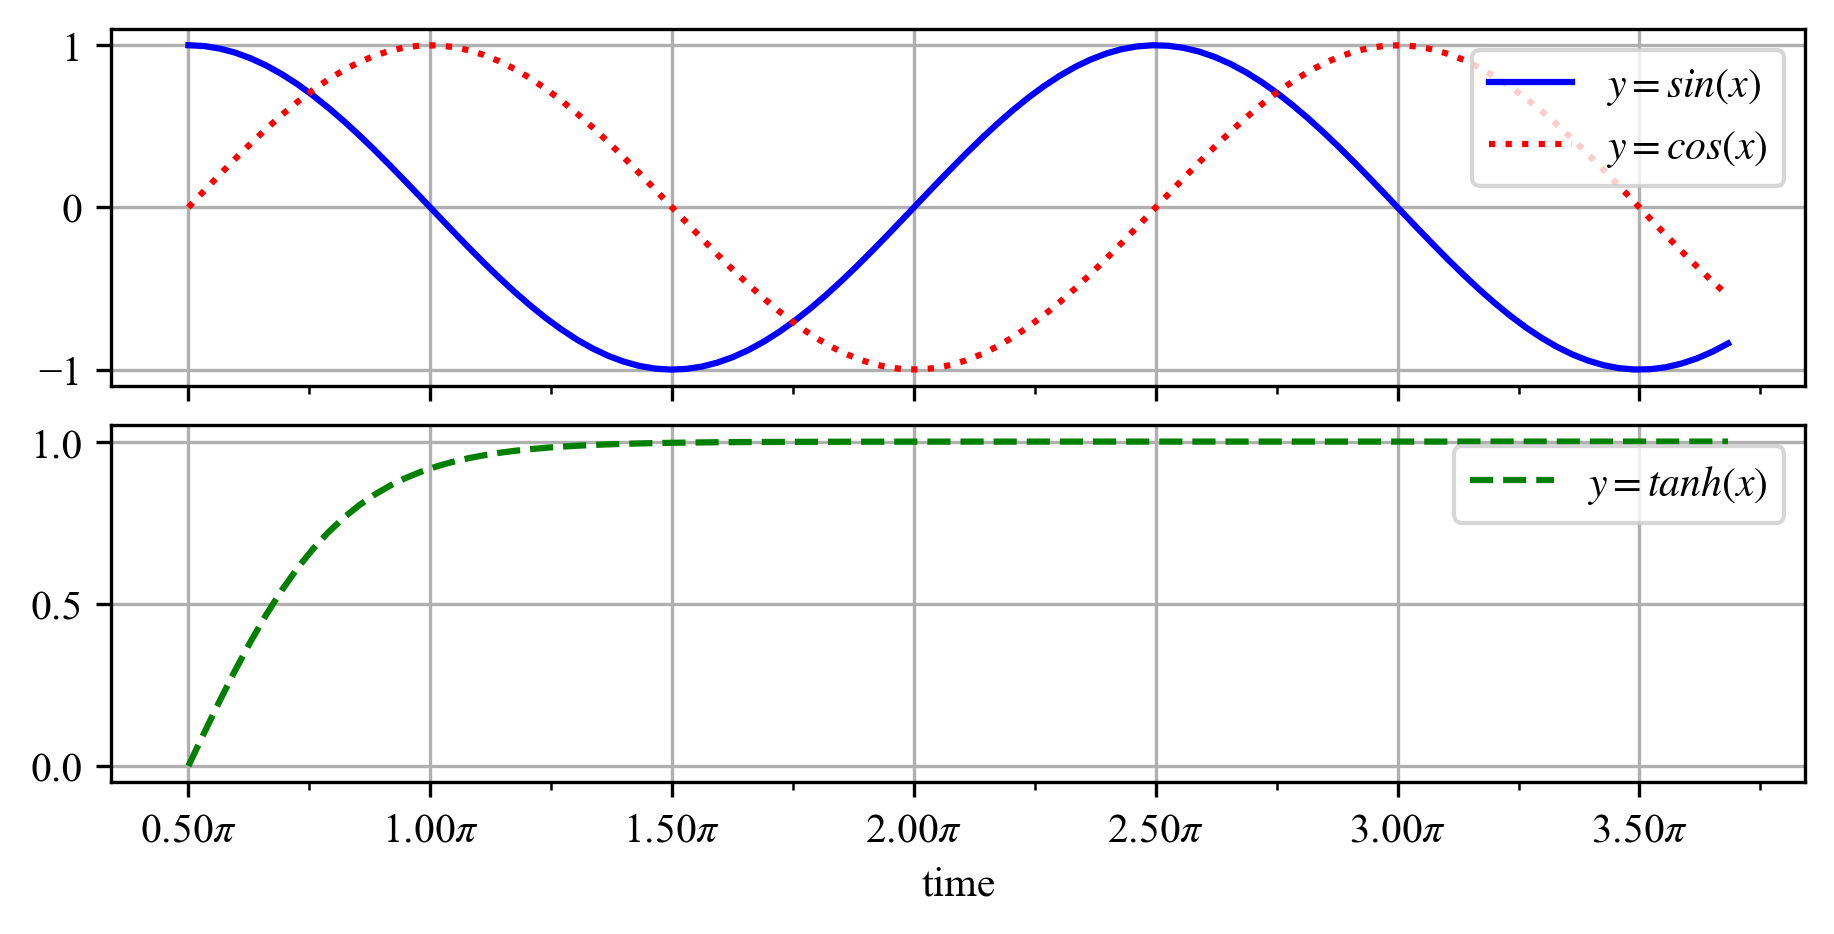

In [24]:
# 后期调整
fig, axes = plt.subplots(2, 1, figsize=(6, 3),
                         sharex=True, facecolor="white")
plot_time_series(x, y1, 'b-', r'$y=sin(x)$', axes[0])
plot_time_series(x, y2, 'r:', r'$y=cos(x)$', axes[0])
plot_time_series(x, y3, 'g--', ax=axes[1])
# 调整格式/添加内容/美化...
axes[0].set_xlabel("")
# 补充图示
axes[1].lines[0].set_label(r"$y=tanh(x)$")
axes[0].legend(loc="upper right")
axes[1].legend(loc="upper right")
axes[0].grid()
axes[1].grid()

plt.savefig("images/pic3_4.png", facecolor=fig.get_facecolor())
plt.show()

In [25]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

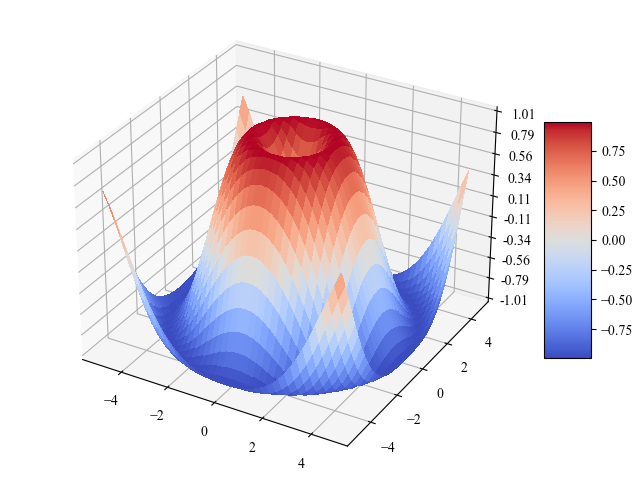

In [26]:
%matplotlib widget

# 交互式画图

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# plt.savefig("images/pic3_5.png", facecolor=fig.get_facecolor())
plt.show()